In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [2]:
E_commerce_data=pd.read_csv("C:\\Users\\User\\Documents\\PDS_PROJ_PIC\\ECOMMERCE.csv")

In [3]:
E_commerce_data

,Timestamp,Age,Gender,Highest Educational Qualification,Do you have any subscription on any E-Commerce site?,Which Types of product you prefer to buy from E-Commerce sites?,"On a scale of 0-5, how much does an overall product rating affect your purchase decision?",Do you generally find various alternatives for the same product in your affordable range?,"On a scale of 0-5 how much will you rate the customer service(Delivery process , after sale service, return policy)",Do you often receive damage products or different products which you have ordered?,Do you find any price difference between online and offline products?,On a scale of 0-5 how much will you prefer others for online shopping?,"On an average, yearly (approximately), how many products you bought from E-commerce sites on pre-Covid situation?","On an average, yearly (approximately), how many products you buy from E-commerce sites on post-Covid situation?",Which e-commerce sites you prefer for buying electronics product?,Which e-commerce sites you prefer for purchasing Garments?,Which e-commerce sites you prefer for buying grocery items?,Email Address,"Which e-commerce sites you prefer for buying educational products(books, Pens, paper etc.)?"
0,10-04-2021 16:24,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Online Price is greater,5,5,8,Amazon,Myntra,Big Basket,NaN,Amazon
1,10-05-2021 10:27,21,Male,Graduate,Yes,"Electronics, Educational Materials",4,Yes,4,Never,Almost same,4,6,3,Flipkart,Myntra,Grofers,NaN,NaN
2,10-05-2021 11:15,21,Male,Graduate,Yes,"Electronics, Educational Materials, Others",4,Yes,5,Never,Online Price is greater,4,4,6,Amazon,Myntra,Big Basket,NaN,NaN
3,10-05-2021 11:26,21,Male,Graduate,Yes,"Electronics, Garments, Educational Materials",4,Yes,3,Never,Offline Price is greater,5,6,10,Amazon,Myntra,Grofers,NaN,NaN
4,10-05-2021 16:43,21,Male,Higher Secondary,No,"Electronics, Fashion Product",4,Yes,5,Never,Offline Price is greater,4,2,2,Flipkart,Myntra,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,10-07-2021 08:41,17,Male,Secondary,Yes,"Electronics, Garments",5,Yes,5,Never,Almost same,4,5,3,Amazon,Myntra,Prefer not to buy,NaN,NaN
108,10-07-2021 12:04,17,Female,Secondary,No,Electronics,1,Yes,3,Never,Almost same,3,0,0,Flipkart,Amazon,Big Basket,NaN,NaN
109,10/17/2021 18:20:50,19,Female,Higher Secondary,Yes,"Garments, Educational Materials, Fashion Product",3,Yes,3,Some times,Offline Price is greater,4,8,4,Flipkart,Amazon,Flipkart,NaN,NaN
110,10/21/2021 19:46:31,21,Male,Post Graduate and above,No,"Electronics, Educational Materials",3,Yes,4,Some times,Online Price is greater,5,12,5,Amazon,Amazon,Prefer not to buy,NaN,NaN


In [4]:
E_commerce_data=E_commerce_data.replace('Jio mart',np.nan)
E_commerce_data=E_commerce_data.replace('Future Group',np.nan)
E_commerce_data=E_commerce_data.replace('Future group',np.nan)
E_commerce_data=E_commerce_data.replace('None',np.nan)
E_commerce_data=E_commerce_data.replace('None,',np.nan)
E_commerce_data=E_commerce_data.replace('More',np.nan)
E_commerce_data=E_commerce_data.replace('No one',np.nan)
E_commerce_data=E_commerce_data.replace("I don't buy groceries online","Prefer not to buy")


In [5]:
E_commerce_data = E_commerce_data.rename({"Highest Educational Qualification":"Qualification",
                                         "Which e-commerce sites you prefer for buying grocery items?":"Grocery_Sites"}, axis = 1)

In [6]:
data =  pd.DataFrame(columns=["Do you have any subscription on any E-Commerce site?", "Grocery_Sites"])

In [7]:
data['Subscription'] = E_commerce_data['Do you have any subscription on any E-Commerce site?']
data['Grocery_Sites'] = E_commerce_data['Grocery_Sites']
data.pop('Do you have any subscription on any E-Commerce site?')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
107    NaN
108    NaN
109    NaN
110    NaN
111    NaN
Name: Do you have any subscription on any E-Commerce site?, Length: 112, dtype: object

In [8]:
data

,Grocery_Sites,Subscription
0,Big Basket,Yes
1,Grofers,Yes
2,Big Basket,Yes
3,Grofers,Yes
4,NaN,No
...,...,...
107,Prefer not to buy,Yes
108,Big Basket,No
109,Flipkart,Yes
110,Prefer not to buy,No


In [9]:
Have_subscription=data[data.Subscription.str.startswith('Y')]
Have_No_subscription=data[data.Subscription.str.startswith('N')]

In [10]:
df = pd.DataFrame(Have_subscription.Grocery_Sites.value_counts()); df
df1 = pd.DataFrame(Have_No_subscription.Grocery_Sites.value_counts())

In [11]:
Websites = list(df.index); Websites
websites1 = list(df1.index)

In [12]:
clrs = ["yellow", "blue", "green"]
clrs1 = ["yellow", "blue", "magenta", "orange", "cyan"]

In [13]:
total = sum(df.Grocery_Sites); total
total1 = sum(df1.Grocery_Sites)

In [14]:
value = list((df.Grocery_Sites)*(100/total)); value
value1 = list((df1.Grocery_Sites)*(100/total1));

In [15]:
value

[31.250000000000004,
 20.833333333333336,
 16.666666666666668,
 16.666666666666668,
 10.416666666666668,
 4.166666666666667]

In [16]:
value1

[29.09090909090909,
 25.454545454545453,
 14.545454545454545,
 10.909090909090908,
 10.909090909090908,
 9.09090909090909]

In [17]:
exwidth = [0.2,0.1,0,0,0,0]
exwidth1 = [0.2,0.1,0,0,0,0]

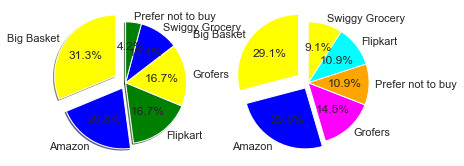

In [18]:
f = plt.figure()
plt.subplot(1,2,1)
plt.pie(value, labels = Websites, startangle=90, explode = exwidth, shadow = True, colors = clrs,
       autopct = "%0.1f%%")
plt.subplot(1,2,2)
plt.pie(value1, labels= websites1, startangle=90, explode = exwidth1, shadow=False, colors = clrs1,
       autopct = "%0.1f%%")
f.savefig('3(d).png',facecolor='lightgrey',transparent=True)